Making the model

In [2]:
import numpy as np
import seaborn as sns
from xgboost import XGBRegressor
import sys
sys.path.insert(0, '../src')# way to get access to the scr path
from data_frame_work import DataFrameWork
from regressor_models import RegressorModels

immo = DataFrameWork.get_data_frame()
display(immo.head())
display(immo.shape)

,price,floor,bedroomCount,netHabitableSurface,constructionYear,facadeCount,floorCount,hasLift,hasGarden,gardenSurface,...,A,A+,A++,B,C,D,E,F,G,NO_EPC_SCORE
id,,,,,,,,,,,,,,,,,,,,,
10616910,399000,1.0,2.0,125.0,2013.0,1.0,1.0,1,0,0.0,...,0,0,0,1,0,0,0,0,0,0
10616911,423000,2.0,3.0,155.0,2014.0,4.0,3.0,1,0,0.0,...,0,0,0,1,0,0,0,0,0,0
10616934,169000,0.0,1.0,54.0,1850.0,2.0,2.0,0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
10616833,275000,1.0,1.0,66.0,2025.0,3.0,3.0,1,0,0.0,...,1,0,0,0,0,0,0,0,0,0
10616966,185000,3.0,2.0,74.0,1975.0,1.0,3.0,0,0,0.0,...,0,0,0,0,1,0,0,0,0,0


(10540, 89)

In [3]:
# getting the X and y parameters
X, y = RegressorModels.get_X_y(immo)

print(X.shape)
print(y.shape)

(10540, 85)
(10540, 1)


In [4]:
# Splitting the X and y parameters with the train and test information in
X_train, X_test, y_train, y_test = RegressorModels.get_train_test(X, y)

print(X_train.shape); print(X_test.shape)

(7378, 85)
(3162, 85)


In [5]:
# making instantiation of XGBRegressor
xgb_r = XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
# Fitting the model
xgb_r.fit(X_train, y_train)

[16:09:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [6]:
# predition with training data 
pred_train= xgb_r.predict(X_train)
# calculating performance metric training
score, mse, rmse, mae = RegressorModels.get_performance(y_train, pred_train)

# Print the performance metrics
print('Train: Score: %.2f' %score)
print('Train: Mean Squared Error:', np.sqrt(mse))
print('Train: Root Mean Squared Error:', rmse)
print('Train: Mean Absolute Error: ', mae)

# predition with test data
pred_test= xgb_r.predict(X_test)
# calculating performance metric test
score, mse, rmse, mae = RegressorModels.get_performance(y_test, pred_test)

# Print the performance metrics
print('______________________________________')
print('Test: Score: %.2f' %score)
print('Test: Mean Squared Error:', np.sqrt(mse))
print('Test: Root Mean Squared Error:', rmse)
print('Test: Mean Absolute Error: ', mae)

Train: Score: 0.84
Train: Mean Squared Error: 162915.78559024035
Train: Root Mean Squared Error: 162915.78559024035
Train: Mean Absolute Error:  93152.7631058976
______________________________________
Test: Score: 0.62
Test: Mean Squared Error: 246532.40749331104
Test: Root Mean Squared Error: 246532.40749331104
Test: Mean Absolute Error:  118119.20884971932


[Text(0.5, 1.0, 'XG Boost - Test VS Predicted data'),
 Text(0, 0.5, 'Predicted data'),
 Text(0.5, 0, 'Test data')]

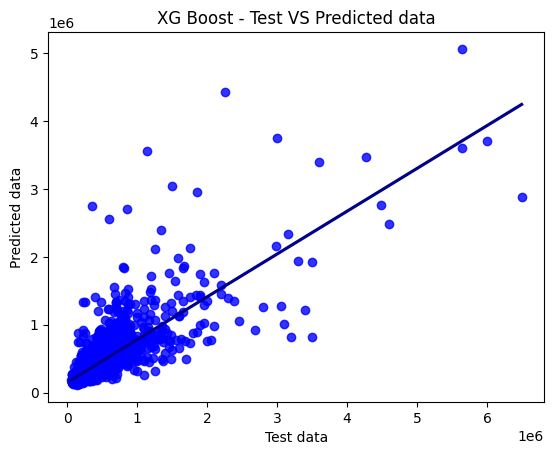

In [7]:
# Plot measuring the test and prediction test data
sns.regplot(x=y_test, y=pred_test, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "darkblue"}).set(
    title='XG Boost - Test VS Predicted data', ylabel='Predicted data', xlabel='Test data')